In [1]:
import os
os.chdir("/content/drive/MyDrive/Servet/Yapılacak İşler/furkan_crm")

In [2]:
import pandas as pd

data = pd.read_excel('Online Retail.xlsx')

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Veriyi inceleme

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [4]:
print(data.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [5]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


# Eksik veri analizi:

- Description sütununda 1454 eksik değer var.

- CustomerID sütununda 135080 eksik değer var.

# Temizlik

In [6]:
data = data.dropna(subset=['Description', 'CustomerID'])

print(data.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


# Aykırı değer analizi:

- Quantity sütununda negatif değerler var (örneğin, -80995). Bu, muhtemelen iade işlemleri.
- UnitPrice sütununda negatif değerler var (örneğin, -11062). Bu da hatalı olabilir.

In [7]:
data = data[data['Quantity'] > 0]
data = data[data['UnitPrice'] > 0]

data.describe()


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397884.000000,397884,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,179.331775,NaN,22.097877,1713.141560


# Düzeltilecek Türler:

- InvoiceDate: Zaten datetime64 formatında görünüyor, bir işlem gerekmez.
- CustomerID: float64 formatında. Bunun tam sayı (int64) olarak değiştirilmesi daha mantıklı.

In [8]:
data['CustomerID'] = data['CustomerID'].astype(int)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int64         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.3+ MB
None


# Benzersiz Müşteri Kimliklerini Kontrol Etme

In [9]:
unique_customers = data['CustomerID'].nunique()
print(f"Benzersiz müşteri sayısı: {unique_customers}")

unique_customer_ids = data['CustomerID'].unique()


Benzersiz müşteri sayısı: 4338


# Müşteri Bazında Veriyi Analiz Edilebilir Hale Getirme

In [10]:
customer_analysis = data.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'UnitPrice': 'sum'
}).reset_index()

customer_analysis['TotalPrice'] = customer_analysis['Quantity'] * customer_analysis['UnitPrice']

print(customer_analysis.head())


   CustomerID  Quantity  UnitPrice  TotalPrice
0       12346     74215       1.04    77183.60
1       12347      2458     481.21  1182814.18
2       12348      2341     178.71   418360.11
3       12349       631     605.10   381818.10
4       12350       197      65.30    12864.10


# Benzersiz Müşteri Kimliklerini Kullanarak Veri Analizi

In [11]:
top_spenders = customer_analysis.sort_values('TotalPrice', ascending=False).head(10)
print(top_spenders)

top_buyers = customer_analysis.sort_values('Quantity', ascending=False).head(10)
print(top_buyers)


      CustomerID  Quantity  UnitPrice    TotalPrice
1879       14911     80265   26185.72  2.101797e+09
1689       14646    196915    5176.09  1.019250e+09
1289       14096     16352   33332.45  5.450522e+08
4010       17841     23071   19848.49  4.579245e+08
2702       16029     40208    8722.39  3.507099e+08
326        12748     25747   12205.60  3.142576e+08
1333       14156     57885    5357.68  3.101293e+08
2176       15311     38194    5961.86  2.277073e+08
55         12415     77374    2097.08  1.622595e+08
562        13089     31070    4977.35  1.546463e+08
      CustomerID  Quantity  UnitPrice    TotalPrice
1689       14646    196915    5176.09  1.019250e+09
3008       16446     80997       4.98  4.033651e+05
1879       14911     80265   26185.72  2.101797e+09
55         12415     77374    2097.08  1.622595e+08
0          12346     74215       1.04  7.718360e+04
3728       17450     69993    1143.32  8.002440e+07
3771       17511     64549    2221.28  1.433814e+08
4201       1

# Recency (Güncellik) Hesaplama

In [12]:
import datetime as dt

analysis_date = dt.datetime(2011, 12, 10)

recency = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (analysis_date - x.max()).days
}).reset_index()
recency.columns = ['CustomerID', 'Recency']

recency.head()


,CustomerID,Recency
0,12346,325
1,12347,2
2,12348,75
3,12349,18
4,12350,310


# Frequency (Sıklık) Hesaplama

In [13]:
frequency = data.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique'
}).reset_index()
frequency.columns = ['CustomerID', 'Frequency']

frequency.head()


,CustomerID,Frequency
0,12346,1
1,12347,7
2,12348,4
3,12349,1
4,12350,1


In [14]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [15]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [16]:
monetary = data.groupby('CustomerID').agg({
    'TotalPrice': 'sum'
}).reset_index()
monetary.columns = ['CustomerID', 'Monetary']

monetary.head()


,CustomerID,Monetary
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


# RFM Tablosunu Oluşturma

In [17]:
rfm = recency.merge(frequency, on='CustomerID').merge(monetary, on='CustomerID')
rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12346,325,1,77183.60
1,12347,2,7,4310.00
2,12348,75,4,1797.24
3,12349,18,1,1757.55
4,12350,310,1,334.40


# RFM Skorlarını Hesaplama

In [18]:
# Sabit aralıklı RFM skorları hesaplama
rfm['R_Score'] = pd.cut(rfm['Recency'], bins=5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.cut(rfm['Frequency'], bins=5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.cut(rfm['Monetary'], bins=5, labels=[1, 2, 3, 4, 5])

# Toplam RFM skoru
rfm['RFM_Score'] = rfm['R_Score'].astype(int) + rfm['F_Score'].astype(int) + rfm['M_Score'].astype(int)

print(rfm.head())


   CustomerID  Recency  Frequency  Monetary R_Score F_Score M_Score  RFM_Score
0       12346      325          1  77183.60       1       1       2          4
1       12347        2          7   4310.00       5       1       1          7
2       12348       75          4   1797.24       4       1       1          6
3       12349       18          1   1757.55       5       1       1          7
4       12350      310          1    334.40       1       1       1          3


# Segmentasyon

In [19]:
rfm['Segment'] = pd.cut(rfm['RFM_Score'], bins=[2, 6, 9, 12, 15], labels=['Uyuyan', 'Riskli', 'Orta', 'Sadık'])

rfm['Segment'].value_counts()


,count
Segment,
Riskli,2672
Uyuyan,1657
Orta,8
Sadık,1


# Segmentlerin Özelliklerini Gruplayarak İnceleme

In [20]:
segment_analysis = rfm.groupby('Segment').agg({
    'Recency': ['mean', 'median'],
    'Frequency': ['mean', 'median'],
    'Monetary': ['mean', 'median'],
    'CustomerID': 'count'
}).reset_index()

segment_analysis


<ipython-input-20-cd0a5cb15bfc>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_analysis = rfm.groupby('Segment').agg({


Segment     Recency          Frequency              Monetary              \
                 mean median        mean median           mean      median   
0  Uyuyan  196.617381  185.0    1.929390    1.0     761.522814     372.090   
1  Riskli   27.521707   23.0    5.427021    3.0    2369.820300    1027.210   
2    Orta    2.500000    0.5   79.125000   66.5  146697.462500  142926.065   
3   Sadık    1.000000    1.0  201.000000  201.0  143825.060000  143825.060   

  CustomerID  
       count  
0       1657  
1       2672  
2          8  
3          1

# Segmentlerin Harcama ve Sıklık Özelliklerini Görselleştirme

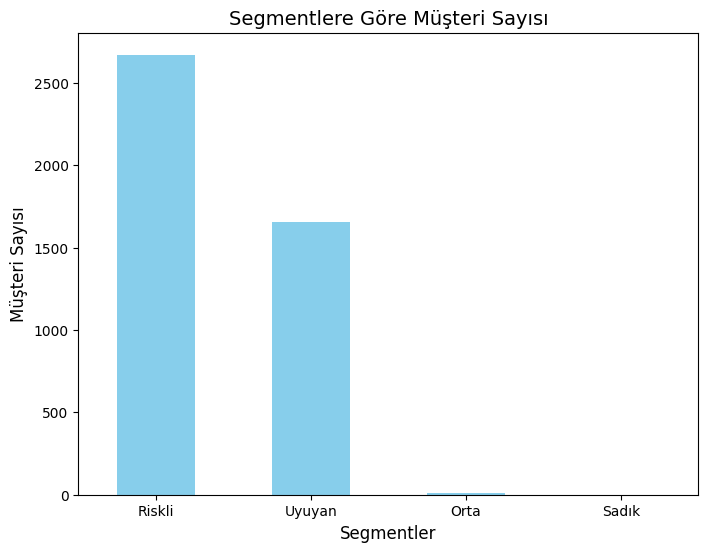

<ipython-input-21-0c48a8962c9f>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm.groupby('Segment')['Monetary'].mean().plot(kind='bar', color='lightcoral')


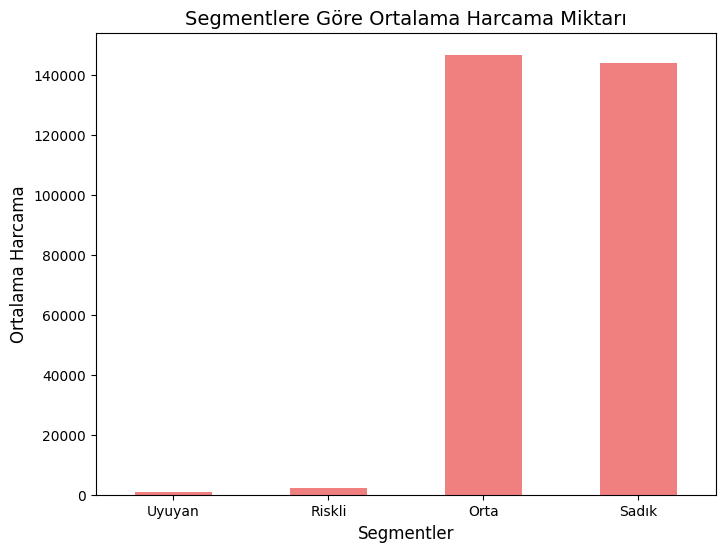

<ipython-input-21-0c48a8962c9f>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm.groupby('Segment')['Frequency'].mean().plot(kind='bar', color='gold')


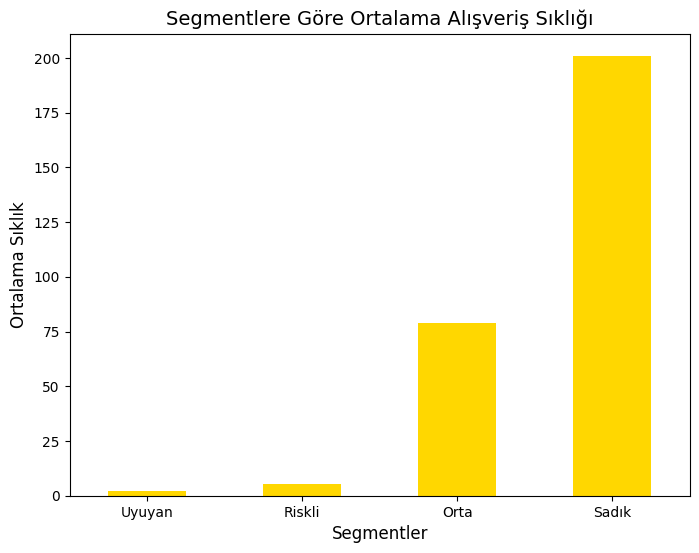

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
rfm['Segment'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Segmentlere Göre Müşteri Sayısı', fontsize=14)
plt.xlabel('Segmentler', fontsize=12)
plt.ylabel('Müşteri Sayısı', fontsize=12)
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(8, 6))
rfm.groupby('Segment')['Monetary'].mean().plot(kind='bar', color='lightcoral')
plt.title('Segmentlere Göre Ortalama Harcama Miktarı', fontsize=14)
plt.xlabel('Segmentler', fontsize=12)
plt.ylabel('Ortalama Harcama', fontsize=12)
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(8, 6))
rfm.groupby('Segment')['Frequency'].mean().plot(kind='bar', color='gold')
plt.title('Segmentlere Göre Ortalama Alışveriş Sıklığı', fontsize=14)
plt.xlabel('Segmentler', fontsize=12)
plt.ylabel('Ortalama Sıklık', fontsize=12)
plt.xticks(rotation=0)
plt.show()


# RFM Değerlerini 2D Scatter Plot ile Görselleştirme

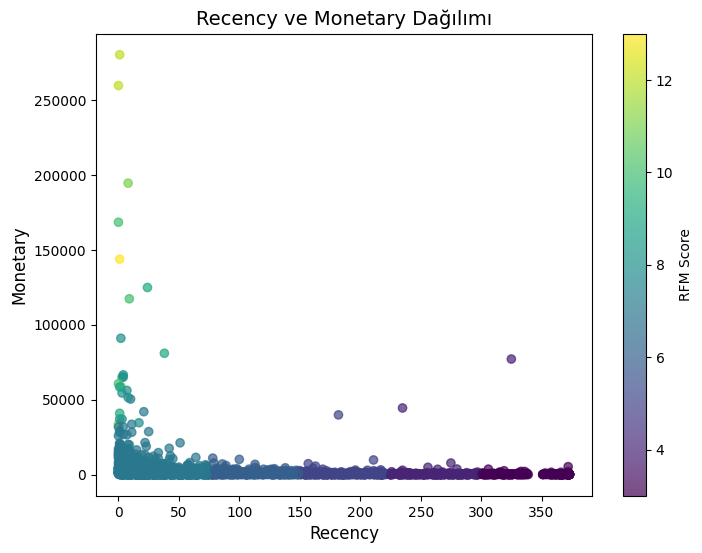

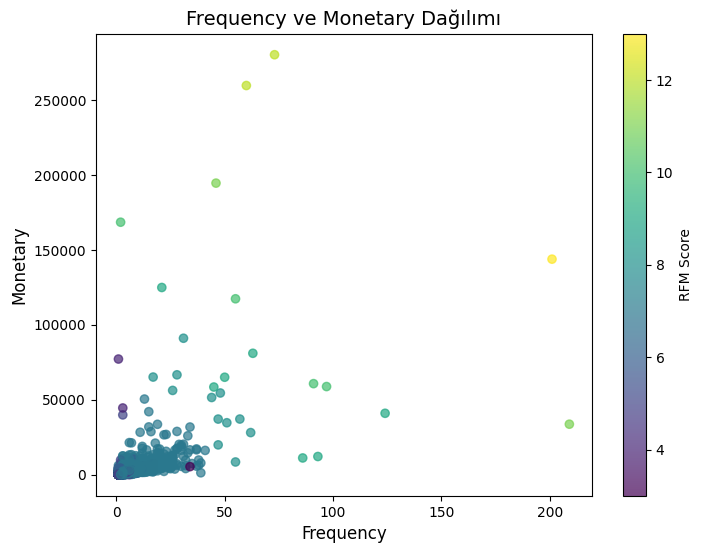

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(rfm['Recency'], rfm['Monetary'], c=rfm['RFM_Score'], cmap='viridis', alpha=0.7)
plt.colorbar(label='RFM Score')
plt.title('Recency ve Monetary Dağılımı', fontsize=14)
plt.xlabel('Recency', fontsize=12)
plt.ylabel('Monetary', fontsize=12)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(rfm['Frequency'], rfm['Monetary'], c=rfm['RFM_Score'], cmap='viridis', alpha=0.7)
plt.colorbar(label='RFM Score')
plt.title('Frequency ve Monetary Dağılımı', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Monetary', fontsize=12)
plt.show()


# Kümeleme

In [23]:
from sklearn.preprocessing import StandardScaler

rfm_features = rfm[['Recency', 'Frequency', 'Monetary']]

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)


# Optimum Küme Sayısını Belirleme (Elbow Method)

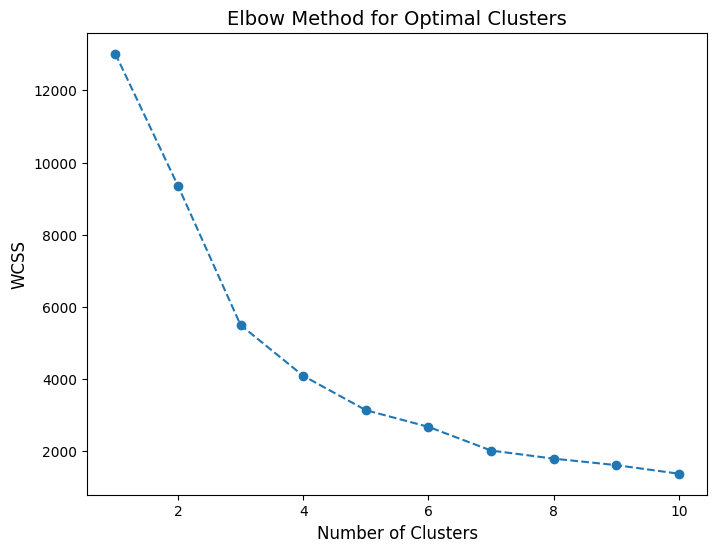

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []  # Within-Cluster-Sum-of-Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters', fontsize=14)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
plt.show()


In [26]:
optimal_clusters = 4

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

rfm


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment,Cluster
0,12346,325,1,77183.60,1,1,2,4,Uyuyan,3
1,12347,2,7,4310.00,5,1,1,7,Riskli,0
2,12348,75,4,1797.24,4,1,1,6,Uyuyan,0
3,12349,18,1,1757.55,5,1,1,7,Riskli,0
4,12350,310,1,334.40,1,1,1,3,Uyuyan,1
...,...,...,...,...,...,...,...,...,...,...
4333,18280,277,1,180.60,2,1,1,4,Uyuyan,1
4334,18281,180,1,80.82,3,1,1,5,Uyuyan,1
4335,18282,7,2,178.05,5,1,1,7,Riskli,0
4336,18283,3,16,2094.88,5,1,1,7,Riskli,3


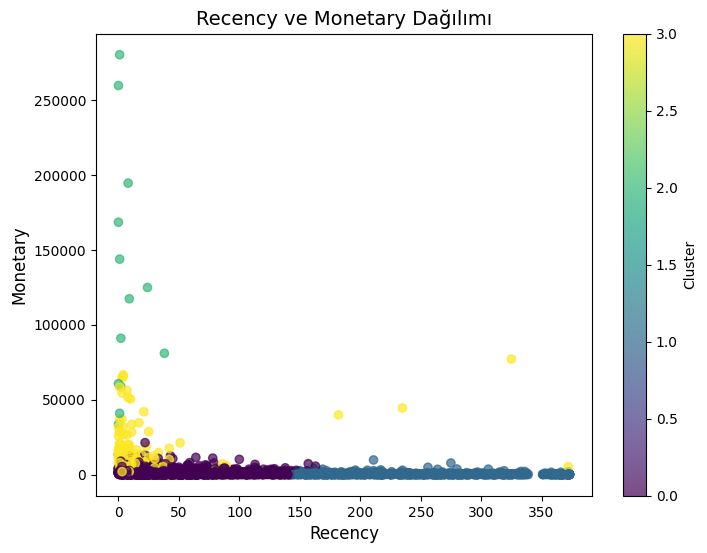

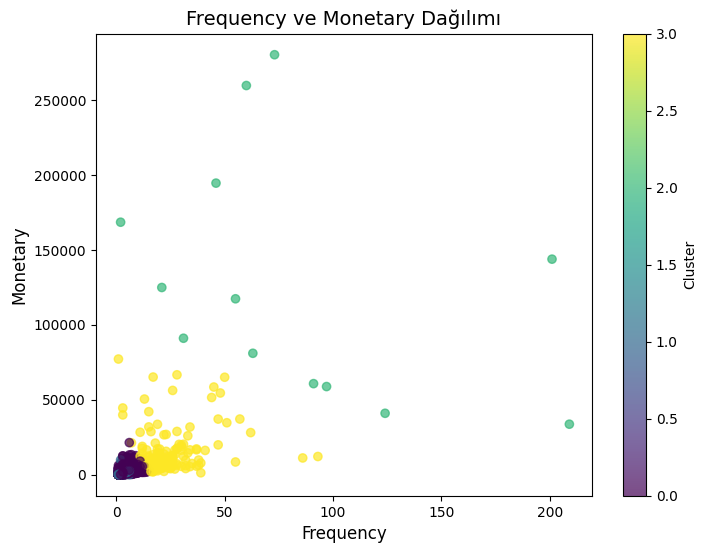

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(rfm['Recency'], rfm['Monetary'], c=rfm['Cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster')
plt.title('Recency ve Monetary Dağılımı', fontsize=14)
plt.xlabel('Recency', fontsize=12)
plt.ylabel('Monetary', fontsize=12)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(rfm['Frequency'], rfm['Monetary'], c=rfm['Cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster')
plt.title('Frequency ve Monetary Dağılımı', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Monetary', fontsize=12)
plt.show()


# Satın Alma Eğilimi Tahmini

In [28]:
rfm['Target'] = rfm['Recency'].apply(lambda x: 1 if x <= 30 else 0)


# Özellik Seçimi

In [29]:
features = rfm[['Recency', 'Frequency', 'Monetary', 'RFM_Score']]
target = rfm['Target']


# Veriyi Eğitim ve Test Olarak Ayırma

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)


# Modelleme

In [31]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)


In [33]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred))
print("F1 Score (Logistic Regression):", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Accuracy (Decision Tree):", accuracy_score(y_test, y_pred_dt))
print("F1 Score (Decision Tree):", f1_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Accuracy (Logistic Regression): 0.999231950844854
F1 Score (Logistic Regression): 0.9990089197224975
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       798
           1       1.00      1.00      1.00       504

    accuracy                           1.00      1302
   macro avg       1.00      1.00      1.00      1302
weighted avg       1.00      1.00      1.00      1302

Accuracy (Decision Tree): 1.0
F1 Score (Decision Tree): 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       798
           1       1.00      1.00      1.00       504

    accuracy                           1.00      1302
   macro avg       1.00      1.00      1.00      1302
weighted avg       1.00      1.00      1.00      1302



In [34]:
high_propensity = rfm[rfm['Target'] == 1]
print(high_propensity.describe())

low_propensity = rfm[rfm['Target'] == 0]
print(low_propensity.describe())


         CustomerID      Recency    Frequency       Monetary    RFM_Score  \
count   1667.000000  1667.000000  1667.000000    1667.000000  1667.000000   
mean   15278.694661    13.204559     7.248350    3783.449814     7.035993   
std     1738.829790     8.949748    11.390725   13905.854535     0.335782   
min    12347.000000     0.000000     1.000000      20.800000     7.000000   
25%    13801.000000     5.000000     2.000000     586.060000     7.000000   
50%    15195.000000    12.000000     4.000000    1346.970000     7.000000   
75%    16845.000000    21.000000     8.000000    2984.625000     7.000000   
max    18283.000000    30.000000   209.000000  280206.020000    13.000000   

           Cluster  Target  
count  1667.000000  1667.0  
mean      0.354529     1.0  
std       0.961277     0.0  
min       0.000000     1.0  
25%       0.000000     1.0  
50%       0.000000     1.0  
75%       0.000000     1.0  
max       3.000000     1.0  
         CustomerID      Recency    Frequency

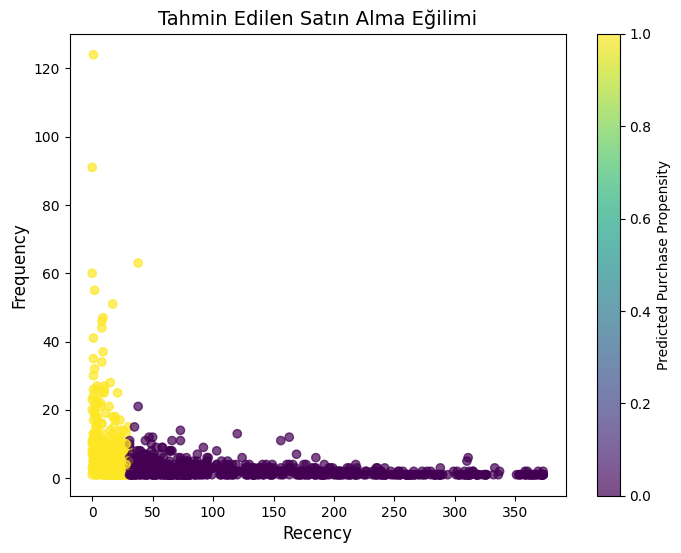

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_test['Recency'], X_test['Frequency'], c=y_pred, cmap='viridis', alpha=0.7)
plt.colorbar(label='Predicted Purchase Propensity')
plt.title('Tahmin Edilen Satın Alma Eğilimi', fontsize=14)
plt.xlabel('Recency', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()
